In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#import autosklearn.classification


In [112]:
df=pd.read_csv(r"C:\Users\vivaa\OneDrive\Desktop\Loan Approval & Credit Risk Predictor\Datasets\Cleaned Loan_approval_dataset")

In [113]:
df.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [114]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)


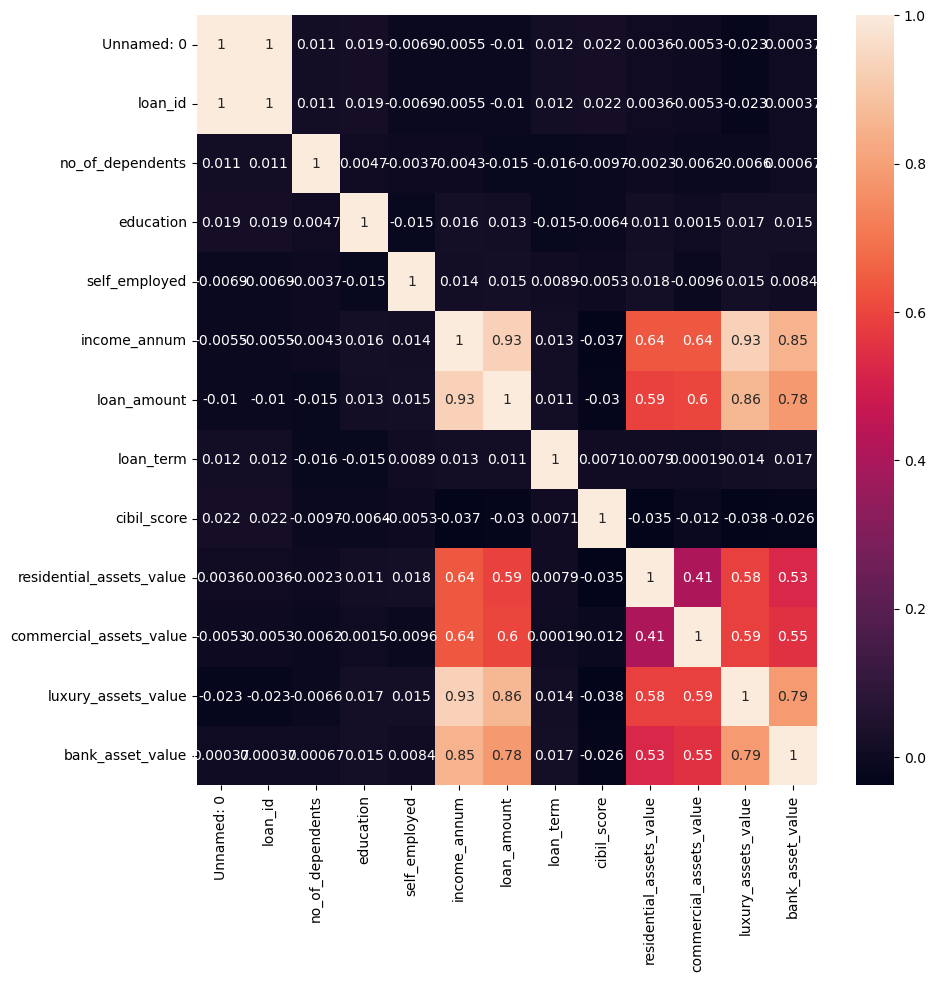

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True);
plt.show()

In [116]:
X_train.corr()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
Unnamed: 0,1.00,1.00,0.01,0.02,-0.01,-0.01,-0.01,0.01,0.02,0.00,-0.01,-0.02,0.00
loan_id,1.00,1.00,0.01,0.02,-0.01,-0.01,-0.01,0.01,0.02,0.00,-0.01,-0.02,0.00
no_of_dependents,0.01,0.01,1.00,0.00,-0.00,-0.00,-0.01,-0.02,-0.01,-0.00,-0.01,-0.01,0.00
education,0.02,0.02,0.00,1.00,-0.01,0.02,0.01,-0.01,-0.01,0.01,0.00,0.02,0.02
self_employed,-0.01,-0.01,-0.00,-0.01,1.00,0.01,0.02,0.01,-0.01,0.02,-0.01,0.02,0.01
income_annum,-0.01,-0.01,-0.00,0.02,0.01,1.00,0.93,0.01,-0.04,0.64,0.64,0.93,0.85
loan_amount,-0.01,-0.01,-0.01,0.01,0.02,0.93,1.00,0.01,-0.03,0.59,0.60,0.86,0.78
loan_term,0.01,0.01,-0.02,-0.01,0.01,0.01,0.01,1.00,0.01,0.01,0.00,0.01,0.02
cibil_score,0.02,0.02,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,1.00,-0.04,-0.01,-0.04,-0.03
residential_assets_value,0.00,0.00,-0.00,0.01,0.02,0.64,0.59,0.01,-0.04,1.00,0.41,0.58,0.53


In [117]:
for index, row in X_train.corr().iterrows():
    for value in row:
        if(value>0.8 and value!=1):
            print(index)

income_annum
income_annum
income_annum
loan_amount
loan_amount
luxury_assets_value
luxury_assets_value
bank_asset_value


In [118]:
X_train.drop(['loan_amount','luxury_assets_value','bank_asset_value','loan_id'],axis=1,inplace=True)
X_test.drop(['loan_amount','luxury_assets_value','bank_asset_value','loan_id'],axis=1,inplace=True)

In [119]:
X_train.head()

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value
1675,1675,5,0,0,7900000,6,568,5800000,13900000
1164,1164,0,0,1,9600000,12,710,23800000,10300000
192,192,1,1,0,800000,8,682,2200000,1100000
910,910,2,1,1,4900000,18,754,8200000,3300000
567,567,5,1,1,3000000,12,441,8500000,2500000


In [120]:
#X_train['income_annum']=X_train['income_annum']/100000
#X_train['residential_assets_value']=X_train['residential_assets_value']/100000
#X_train['commercial_assets_value']=X_train['commercial_assets_value']/100000

In [121]:
X_train.drop('Unnamed: 0',axis=1,inplace=True)
X_test.drop('Unnamed: 0',axis=1,inplace=True)

In [122]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [123]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value
1675,5,0,0,7900000,6,568,5800000,13900000
1164,0,0,1,9600000,12,710,23800000,10300000
192,1,1,0,800000,8,682,2200000,1100000
910,2,1,1,4900000,18,754,8200000,3300000
567,5,1,1,3000000,12,441,8500000,2500000


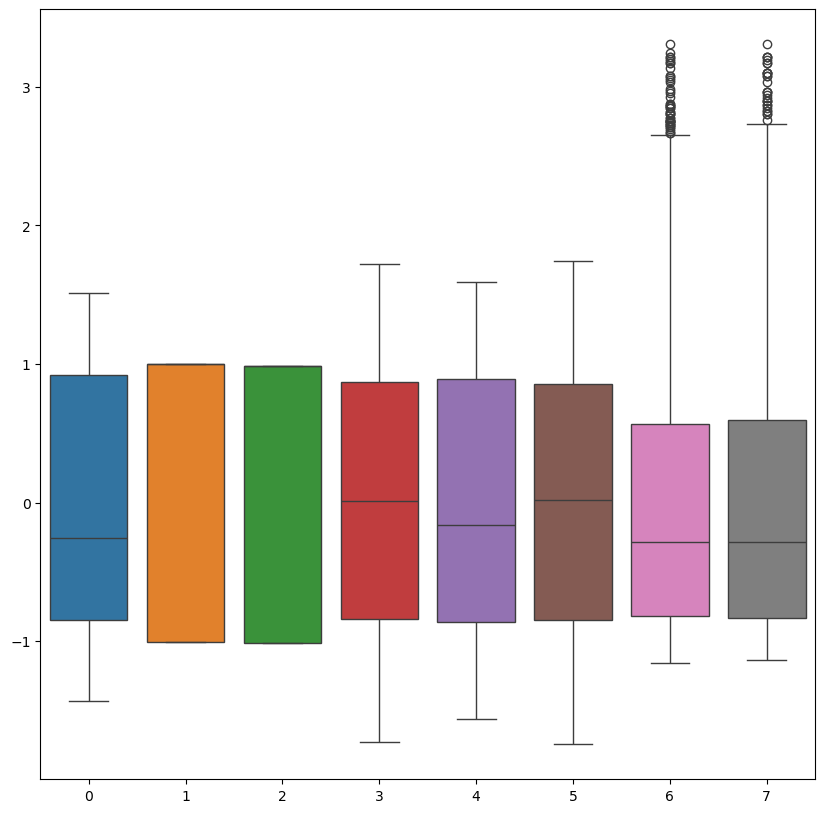

In [124]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled)
plt.show()

In [125]:
logistic=LogisticRegression(random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [200, 500]
}

grid = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

logistic.fit(X_train_scaled,y_train)
y_pred=logistic.predict(X_test_scaled)
#print(y_pred)

score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Score: 0.914519906323185
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       319
           1       0.93      0.93      0.93       535

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
 [[282  37]
 [ 36 499]]


In [126]:
rfc=RandomForestClassifier(random_state=42)
rf_params = {"max_depth": [5, 8, 15, None, 10],
"max_features": [5, 7, "auto", 8],
"min_samples_split": [2, 8, 15, 20],
"n_estimators": [100, 200, 500, 1000]}
random = RandomizedSearchCV(estimator=rfc,
param_distributions=rf_params,
n_iter=100,
cv=5,
verbose=2,
n_jobs=-1,scoring='ROC-AUC')
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)


score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Score: 0.9637002341920374
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       313
           1       0.98      0.97      0.97       541

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854

Confusion Matrix:
 [[300  13]
 [ 18 523]]


In [127]:
treeclassifier=DecisionTreeClassifier()
param={
'criterion':['gini','entropy', 'log_loss'],
'splitter':['best','random'],
'max_depth':[1,2,3,4,5],
'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='ROC-AUC')
treeclassifier.fit(X_train,y_train)
y_pred=treeclassifier.predict(X_test)

score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Score: 0.9613583138173302
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       313
           1       0.97      0.96      0.97       541

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854

Confusion Matrix:
 [[299  14]
 [ 19 522]]


In [128]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
import pandas as pd

# This forces pandas to display all columns without hiding any
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2120, number of negative: 1295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620791 -> initscore=0.492905
[LightGBM] [Info] Start training from score 0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [129]:
X_train.nunique().sort_values()


education                     2
self_employed                 2
no_of_dependents              6
loan_term                    10
income_annum                 98
commercial_assets_value     185
residential_assets_value    277
cibil_score                 599
dtype: int64

In [130]:
X_train.var().sort_values()


self_employed                           0.25
education                               0.25
no_of_dependents                        2.88
loan_term                              32.73
cibil_score                         29648.95
income_annum                7906543168642.44
commercial_assets_value    19108235852544.02
residential_assets_value   42821967898953.72
dtype: float64